In [2]:
import pandas as pd
df = pd.read_excel("wrime3.xlsx",engine = "openpyxl")
df

,Sentence,UserID,Train/Dev/Test,Writer_Joy,Writer_Sadness,Writer_Anticipation,Writer_Surprise,Writer_Anger,Writer_Fear,Writer_Disgust,Writer_Trust
0,ぼけっとしてたらこんな時間｡チャリあるから食べにでたいのに…,1,train,0,0,1,0,0,0,0,0
1,今日の月も白くて明るい。昨日より雲が少なくてキレイな? と立ち止まる帰り道｡チャリなし生活も...,1,train,1,0,1,0,0,0,0,1
2,早寝するつもりが飲み物がなくなりコンビニへ｡ん､今日、風が涼しいな。,1,train,0,0,0,0,0,0,0,1
3,眠い、眠れない。,1,train,0,1,0,0,0,0,0,0
4,ただいま? って新体操してるやん!外食する気満々で家に何もないのに!テレビから離れられない…!,1,train,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
43195,真夜中にふと思い立ち、ノートPCを持って部屋を出て、ダイニングで仕事したらすんごい捗った。\...,80,train,0,0,1,0,0,0,0,1
43196,ぐっどこんでぃしょん。\n心も頭もクリア。\n秋分の日のおかげかな？\n人と自然としっとり過...,80,train,0,0,0,0,0,0,0,1
43197,朝から免許の更新へ。\n90分で終わり、出口へ向かうと献血の呼びかけが。\nみんな通り過ぎて...,80,train,1,0,1,0,0,0,0,1
43198,夜も更けて参りましたが、食後のコーヒーが飲みたいのでドリップ開始…\n\nぼんやり秋の夜長を...,80,train,1,0,0,0,0,0,0,0


In [3]:
!nvidia-smi

Thu Jan 11 10:04:13 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   37C    P8    21W / 350W |   1086MiB / 24234MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
df_train = df[(df["Train/Dev/Test"] == "train")]

train_docs = df_train["Sentence"].tolist()

train_label1= df_train["Writer_Joy"].astype(float).tolist()
train_label2 = df_train["Writer_Sadness"].astype(float).tolist()
train_label3 = df_train["Writer_Anticipation"].astype(float).tolist()
train_label4 = df_train["Writer_Surprise"].astype(float).tolist()
train_label5 = df_train["Writer_Anger"].astype(float).tolist()
train_label6 = df_train["Writer_Fear"].astype(float).tolist()
train_label7 = df_train["Writer_Disgust"].astype(float).tolist()
train_label8 = df_train["Writer_Trust"].astype(float).tolist()

#train_labels=[train_label1, train_label2, train_label3, train_label4, train_label5, train_label6,  train_label7, train_label8]

len(train_docs)
#print(train_labels)


40000

In [5]:
train_labels = df_train[['Writer_Joy', 'Writer_Sadness', 'Writer_Anticipation', 'Writer_Surprise', 
          'Writer_Anger', 'Writer_Fear', 'Writer_Disgust', 'Writer_Trust']].values.astype(float).tolist()
df_train["labels"] = train_labels
#df_train

/tmp/ipykernel_444/2337528815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["labels"] = train_labels


In [6]:
df_dev = df[(df["Train/Dev/Test"] == "dev")]

dev_docs = df_dev["Sentence"].tolist()

dev_label1 = df_dev["Writer_Joy"].astype(float).tolist()
dev_label2 = df_dev["Writer_Sadness"].astype(float).tolist()
dev_label3 = df_dev["Writer_Anticipation"].astype(float).tolist()
dev_label4 = df_dev["Writer_Surprise"].astype(float).tolist()
dev_label5 = df_dev["Writer_Anger"].astype(float).tolist()
dev_label6 = df_dev["Writer_Fear"].astype(float).tolist()
dev_label7 = df_dev["Writer_Disgust"].astype(float).tolist()
dev_label8 = df_dev["Writer_Trust"].astype(float).tolist()

#train_labels=[train_label1, train_label2, train_label3, train_label4, train_label5, train_label6,  train_label7, train_label8]

len(dev_docs)

1200

In [7]:
dev_labels = df_dev[['Writer_Joy', 'Writer_Sadness', 'Writer_Anticipation', 'Writer_Surprise', 
          'Writer_Anger', 'Writer_Fear', 'Writer_Disgust', 'Writer_Trust']].values.astype(float).tolist()
df_dev["labels"] = dev_labels

/tmp/ipykernel_444/802474628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dev["labels"] = dev_labels


In [8]:
df_test = df[(df["Train/Dev/Test"] == "test")]

test_docs = df_test["Sentence"].tolist()

test_label1 = df_test["Writer_Joy"].astype(float).tolist()
test_label2 = df_test["Writer_Sadness"].astype(float).tolist()
test_label3 = df_test["Writer_Anticipation"].astype(float).tolist()
test_label4 = df_test["Writer_Surprise"].astype(float).tolist()
test_label5 = df_test["Writer_Anger"].astype(float).tolist()
test_label6 = df_test["Writer_Fear"].astype(float).tolist()
test_label7 = df_test["Writer_Disgust"].astype(float).tolist()
test_label8 = df_test["Writer_Trust"].astype(float).tolist()

#test_labels=[test_label1, test_label2, test_label3, test_label4, test_label5, test_label6, test_label7, test_label8]



len(test_docs)
#print(test_labels)

2000

In [9]:
test_labels = df_test[['Writer_Joy', 'Writer_Sadness', 'Writer_Anticipation', 'Writer_Surprise', 
          'Writer_Anger', 'Writer_Fear', 'Writer_Disgust', 'Writer_Trust']].values.astype(float).tolist()
#test_labels
#test_labels = torch.tensor(test_labels)
df_test["labels"] = test_labels

df_test["labels"]

/tmp/ipykernel_444/3946297089.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["labels"] = test_labels


24900    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
24901    [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0]
24902    [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
24903    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
24904    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
                           ...                   
40795    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
40796    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
40797    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
40798    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
40799    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Name: labels, Length: 2000, dtype: object

In [10]:
# HuggingFace Transformers のインストール
# - transformers : 主たるモジュール（モデルやトークナイザ)
# - datasets : HuggingFaceで、データセットを扱うためのモジュール
# cf. https://huggingface.co/docs/transformers/installation
! pip install transformers datasets

# 東北大学の日本語用BERT使用に必要なパッケージをインストール
! pip install fugashi ipadic



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 使用するモデルを指定して、トークナイザとモデルを読み込む
checkpoint = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=8, problem_type="multi_label_classification")


Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialize

In [11]:
from datasets import Dataset
import torch
# 1. Transformers用のデータセット形式に変換
# pandas.DataFrame -> datasets.Dataset
target_columns = ['Sentence', 'labels']
train_dataset = Dataset.from_pandas(df_train[target_columns])
dev_dataset = Dataset.from_pandas(df_dev[target_columns])
test_dataset = Dataset.from_pandas(df_test[target_columns])
# 2. Tokenizerを適用（モデル入力のための前処理）
def tokenize_function(batch):
    """Tokenizerを適用 （感情強度の正規化も同時に実施する）."""
    tokenized_batch = tokenizer(batch['Sentence'], truncation=True, padding='max_length')
    #tokenized_batch["labels"] = torch.tensor(batch["labels"])
    return tokenized_batch


train_tokenized_dataset = train_dataset.map(tokenize_function, batched=True)
dev_tokenized_dataset = dev_dataset.map(tokenize_function, batched=True)
test_tokenized_dataset = test_dataset.map(tokenize_function, batched=True)


  0%|          | 0/40 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

In [12]:
train_tokenized_dataset.set_format("torch")
dev_tokenized_dataset.set_format("torch")
test_tokenized_dataset.set_format("torch")


In [13]:
batch_size = 8
metric_name = "f1"

In [14]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

args = TrainingArguments(
    output_dir='./result_multi_1', 
    evaluation_strategy = "steps",
    save_strategy = "steps",
    learning_rate=2e-5,#2e-4
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    logging_steps=500,
    #push_to_hub=True,
)

2023-11-16 00:23:24.875981: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [15]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, hamming_loss
from transformers import EvalPrediction
import torch
import numpy as np

    
# source: https://jesusleal.io/2021/04/21/Longformer-multilabel-classification/
def multi_label_metrics(predictions, labels, threshold=0.5):
    # first, apply sigmoid on predictions which are of shape (batch_size, num_labels)
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))
    # next, use threshold to turn them into integer predictions
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1
    #print(y_pred)
    # finally, compute metrics
    y_true = labels
    #print(y_true)
    f1_macro_average = f1_score(y_true=y_true, y_pred=y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_pred, average = 'macro')
    accuracy = accuracy_score(y_true, y_pred)
    #hammingloss = hamming_loss(y_true, y_pred)
  
    # return as dictionary
    metrics = {'f1': f1_macro_average,
               'roc_auc': roc_auc,
               'accuracy': accuracy,
               #"hamming_loss": hammingloss
              }
    return metrics

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions, 
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds, 
        labels=p.label_ids)
    return result

In [16]:
#64

# from torch import nn

# class CustomTrainer(Trainer):
#     def compute_loss(self, model, inputs, return_outputs=False):
#         labels = inputs.get("labels")
#         # forward pass
#         outputs = model(**inputs)
#         #print(outputs)
#         logits = outputs.get("logits")
#         logits = logits.view(-1).to("cpu")
#         labels = labels.view(-1).to("cpu")
        
#         # compute custom loss (suppose one has 3 labels with different weights)
#         pos_weight = torch.tensor([28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454, 
#                                   28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454,
#                                   28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454,
#                                   28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454,
#                                   28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454,
#                                   28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454,
#                                   28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454,
#                                   28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454])
#         loss_fct = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

#         loss = loss_fct(logits, labels)
      
#         return (loss, outputs) if return_outputs else loss
    
    


In [17]:
from torch import nn

class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.get("labels").to("cpu")

        # forward pass
        outputs = model(**inputs)
        logits = outputs.get("logits").to("cpu")

        
        # compute custom loss (suppose one has 3 labels with different weights)
        pos_weight = torch.tensor([28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454])
        loss_fct = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
        #loss_fct = nn.BCEWithLogitsLoss()
        loss = loss_fct(logits, labels)
      
        return (loss, outputs) if return_outputs else loss
    
    


In [18]:
trainer = CustomTrainer(
    model = model,
    args = args,
    train_dataset=train_tokenized_dataset ,
    eval_dataset=dev_tokenized_dataset ,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

/usr/local/lib/python3.8/dist-packages/accelerate/utils/imports.py:197: UserWarning: Intel Extension for PyTorch 1.11 needs to work with PyTorch 1.11.*, but PyTorch 1.12.1+cu113 is found. Please switch to the matching version and run again.
  warnings.warn(


In [19]:
trainer.train()

/usr/local/lib/python3.8/dist-packages/accelerate/utils/imports.py:197: UserWarning: Intel Extension for PyTorch 1.11 needs to work with PyTorch 1.11.*, but PyTorch 1.12.1+cu113 is found. Please switch to the matching version and run again.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
500,1.052400,0.951247,0.413073,0.662586,0.051667
1000,0.994600,0.938912,0.416131,0.659203,0.064167
1500,0.984100,0.919168,0.430279,0.664332,0.076667
2000,0.975900,0.913091,0.435158,0.664694,0.067500
2500,0.963100,0.931217,0.414243,0.671272,0.055000
3000,0.942200,0.902980,0.448545,0.665182,0.084167
3500,0.950600,0.910416,0.439764,0.659368,0.102500
4000,0.939200,0.909260,0.433965,0.676082,0.065000


TrainOutput(global_step=4000, training_loss=0.9752636489868164, metrics={'train_runtime': 931.1686, 'train_samples_per_second': 128.87, 'train_steps_per_second': 16.109, 'total_flos': 8420007346176000.0, 'train_loss': 0.9752636489868164, 'epoch': 0.8})

In [20]:
neg_list = []
pos_list = []

pos_list.append(len(df[df["Writer_Joy"] == 1]))
pos_list.append(len(df[df["Writer_Sadness"] == 1]))
pos_list.append(len(df[df["Writer_Anticipation"] == 1]))
pos_list.append(len(df[df["Writer_Surprise"] == 1]))
pos_list.append(len(df[df["Writer_Anger"] == 1]))
pos_list.append(len(df[df["Writer_Fear"] == 1]))
pos_list.append(len(df[df["Writer_Disgust"] == 1]))
pos_list.append(len(df[df["Writer_Trust"] == 1]))

neg_list.append(len(df[df["Writer_Joy"] == 0]))
neg_list.append(len(df[df["Writer_Sadness"] == 0]))
neg_list.append(len(df[df["Writer_Anticipation"] == 0]))
neg_list.append(len(df[df["Writer_Surprise"] == 0]))
neg_list.append(len(df[df["Writer_Anger"] == 0]))
neg_list.append(len(df[df["Writer_Fear"] == 0]))
neg_list.append(len(df[df["Writer_Disgust"] == 0]))
neg_list.append(len(df[df["Writer_Trust"] == 0]))

print(neg_list)
print(pos_list)

pos_weight = torch.tensor([28804/14396,30633/12567, 30176/13024, 34078/9122, 39131/4069, 37547/5653, 36426/6774, 36746/6454])

[28804, 30633, 30176, 34078, 39131, 37547, 36426, 36746]
[14396, 12567, 13024, 9122, 4069, 5653, 6774, 6454]


In [21]:
trainer.evaluate()

{'eval_loss': 0.9029801487922668,
 'eval_f1': 0.4485453959179223,
 'eval_roc_auc': 0.6651819746117964,
 'eval_accuracy': 0.08416666666666667,
 'eval_runtime': 9.8849,
 'eval_samples_per_second': 121.398,
 'eval_steps_per_second': 15.175,
 'epoch': 0.8}

In [152]:
#torch.save(model, 'multi_pos_weight_.pth')

In [12]:
import torch
model = torch.load('multi_pos_weight_.pth')


In [19]:
pred_result = trainer.predict(test_tokenized_dataset)
pred_result

╭──────────────────────────── Traceback (most recent call last) ────────────────────────────╮
│                                                                                           │
│ /tmp/ipykernel_2472/827558005.py:1 in <cell line: 1>                                      │
│                                                                                           │
│ [Errno 2] No such file or directory: '/tmp/ipykernel_2472/827558005.py'                   │
╰───────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'trainer' is not defined

In [202]:
import numpy as np
y_preds = pred_result.predictions
#dk = pd.DataFrame(y_preds)

#dk2 = pd.DataFrame(y_test)
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(torch.Tensor(y_preds))

predictions = np.zeros(probs.shape)
predictions[np.where(probs >= 0.5)]= 1

predictions = predictions.astype(int)
#y_test = y_test.astype(int)
y_test = test_labels

In [203]:

y_test_hozon = pd.Series(y_test)
y_test_hozon = pd.DataFrame(y_test_hozon, columns = ["y_test"])
predictions = predictions.tolist()


y_pred_hozon = pd.Series(predictions)
y_pred_hozon = pd.DataFrame(y_pred_hozon, columns = ["y_pred"])
y_pred_hozon
y_pred_hozon.to_csv('y_pred_hozon.csv')
y_test_hozon.to_csv('y_test_hozon.csv')
# k = h["y_test"].to_list()


In [13]:
from transformers import TextClassificationPipeline
import torch.nn as nn

class TextClassificationPipelineAddOutputs(TextClassificationPipeline):
    
    def postprocess(self, model_outputs, function_to_apply=None, return_all_scores=False):
        # 既存の処理を行います
        processed = super().postprocess(model_outputs, function_to_apply, return_all_scores)
        
        logits = model_outputs['logits']
        
        logits =torch.sigmoid(logits)
        
        if return_all_scores:
            return [{**proc, **{'logits':logits}} for proc in processed]
        else:
            #print(processed)
            def get_score(data: dict):
                return data['score']
            if len(processed) > 1:
                max_proc = max(processed, key=get_score)
            else:
                max_proc = processed[0]
            return {**max_proc, **{'logits':logits}}
            #return [{**proc, **{'logits':logits}} for proc in processed]

2024-01-11 10:04:44.920222: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [14]:
from transformers import pipeline
from transformers import TextClassificationPipeline


#sentiment_analyzer = pipeline("sentiment-analysis",model = model.to("cpu"), tokenizer = tokenizer)
sentiment_analyzer =TextClassificationPipelineAddOutputs(model = model.to("cpu"), tokenizer = tokenizer)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [15]:
num_labels= {
        "LABEL_0":'喜び',
        "LABEL_1":'悲しみ',
        "LABEL_2":'期待',
        "LABEL_3":'驚き',
        "LABEL_4":'怒り',
        "LABEL_5":'恐れ',
        "LABEL_6":'嫌悪',
        "LABEL_7":'信頼',
}

In [16]:

result = sentiment_analyzer("楽しいね。")

print(num_labels[result[0]['label']])


喜び


In [17]:
import pandas as pd
ketugou = pd.read_excel("../daialogact/zentai1.xlsx")
ketugou.head()


,発話者2,応答者2,対話行為,対話行為2
0,どうよ、調子は。,何かねソービジー。,応答(平叙),応答(平叙)
1,そうなん、何で？,大学の先生のお仕事を頼まれたりするんで、それでワープロ打ったりね、今度留学生が小学校で交流会...,応答(平叙),応答(平叙)
2,え、留学生の世話をしろって？,違う。小学校で留学生と交流会をしましょうというやつの、その留学生自体が集まらんもんで、呼んで...,自己開示,応答(YesNo)
3,あー、呼んでこないといけないんだ。,ギャラは出るの？今、食ってるものがギャラなわけ。,質問(YesNo),質問(YesNo)
4,そう、そうなんだ。,あんたのことだでそういうことはないと俺は信じとる。,自己開示,自己開示


In [18]:
ketugou = ketugou.dropna(how="any", axis=0)

In [19]:
ketugou[ketugou.isna().any(axis=1)]

,発話者2,応答者2,対話行為,対話行為2


In [20]:
hatuwasya = ketugou["発話者2"].to_list()
kanjyou = []

for j in range(len(hatuwasya)):
    # print(j)
    
    result = sentiment_analyzer(hatuwasya[j])
    kanjyou.append(num_labels[result[0]['label']])
    
    
#ketugou["感情"] = kanjyou

#data.to_excel(r + "kanjyou.xlsx", index = False)
#data["感情"].head()

In [22]:
ketugou["感情"] = kanjyou
ketugou

,発話者2,応答者2,対話行為,対話行為2,感情
0,どうよ、調子は。,何かねソービジー。,応答(平叙),応答(平叙),悲しみ
1,そうなん、何で？,大学の先生のお仕事を頼まれたりするんで、それでワープロ打ったりね、今度留学生が小学校で交流会...,応答(平叙),応答(平叙),驚き
2,え、留学生の世話をしろって？,違う。小学校で留学生と交流会をしましょうというやつの、その留学生自体が集まらんもんで、呼んで...,自己開示,応答(YesNo),驚き
3,あー、呼んでこないといけないんだ。,ギャラは出るの？今、食ってるものがギャラなわけ。,質問(YesNo),質問(YesNo),悲しみ
4,そう、そうなんだ。,あんたのことだでそういうことはないと俺は信じとる。,自己開示,自己開示,恐れ
...,...,...,...,...,...
26097,Ｏがね、たまにわけわからんこと言うんだよ。,ああ、Ｏわからんなあ。,共感,共感,嫌悪
26098,夏って窓開けても、熱風が吹いてくるじゃーん。,そうそうそう。そうなんだよね。,共感,共感,恐れ
26099,あの時のつらい副作用を、忘れなさいって言っても無理。,無理、無理よ、無理。だから。,共感,共感,悲しみ
26100,だって汽車って、あたしの中では蒸気で走るものっていう認識があるんだけど。,わかるわかる。あれが汽車だよね。,共感,共感,驚き


In [23]:
ketugou.to_csv("kanjyou_huyo_multi_weight2.csv", index = False)

In [29]:
# from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
# from datasets import load_metric
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support


# def compute_metrics3(true, pred):
#     #バイナリ―でもう一度microにしてみる
#     #precision, recall, f1, _ = precision_recall_fscore_support(true, pred, average='micro')
#     print(precision_recall_fscore_support(true, pred, average="micro"))
#     acc = accuracy_score(true, pred)
#     #print(true)
#     #print(pred)
#     return {
#         'accuracy': acc,
#         'f1': f1,
#         'precision': precision,
#         'recall': recall
#     }



In [34]:
# from collections import ChainMap
# cm = ChainMap(Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust)

In [53]:
# d = {"Joy":Joy,"Sadness":Sadness,"Anticipation":Anticipation,"Surprise":Surprise,"Anger":Anger,"Fear":Fear,"Disgust":Disgust,"Trust":Trust}
# d

{'Joy': {'accuracy': 0.691, 'f1': 0.691, 'precision': 0.691, 'recall': 0.691},
 'Sadness': {'accuracy': 0.675,
  'f1': 0.675,
  'precision': 0.675,
  'recall': 0.675},
 'Anticipation': {'accuracy': 0.636,
  'f1': 0.636,
  'precision': 0.636,
  'recall': 0.636},
 'Surprise': {'accuracy': 0.748,
  'f1': 0.748,
  'precision': 0.748,
  'recall': 0.748},
 'Anger': {'accuracy': 0.819,
  'f1': 0.819,
  'precision': 0.819,
  'recall': 0.819},
 'Fear': {'accuracy': 0.7675,
  'f1': 0.7675,
  'precision': 0.7675,
  'recall': 0.7675},
 'Disgust': {'accuracy': 0.7465,
  'f1': 0.7465,
  'precision': 0.7465,
  'recall': 0.7465},
 'Trust': {'accuracy': 0.5635,
  'f1': 0.5635,
  'precision': 0.5635,
  'recall': 0.5635}}

In [54]:
# hyouka = pd.DataFrame(d)
# hyouka


,Joy,Sadness,Anticipation,Surprise,Anger,Fear,Disgust,Trust
accuracy,0.691,0.675,0.636,0.748,0.819,0.7675,0.7465,0.5635
f1,0.691,0.675,0.636,0.748,0.819,0.7675,0.7465,0.5635
precision,0.691,0.675,0.636,0.748,0.819,0.7675,0.7465,0.5635
recall,0.691,0.675,0.636,0.748,0.819,0.7675,0.7465,0.5635


<Figure size 640x480 with 0 Axes>

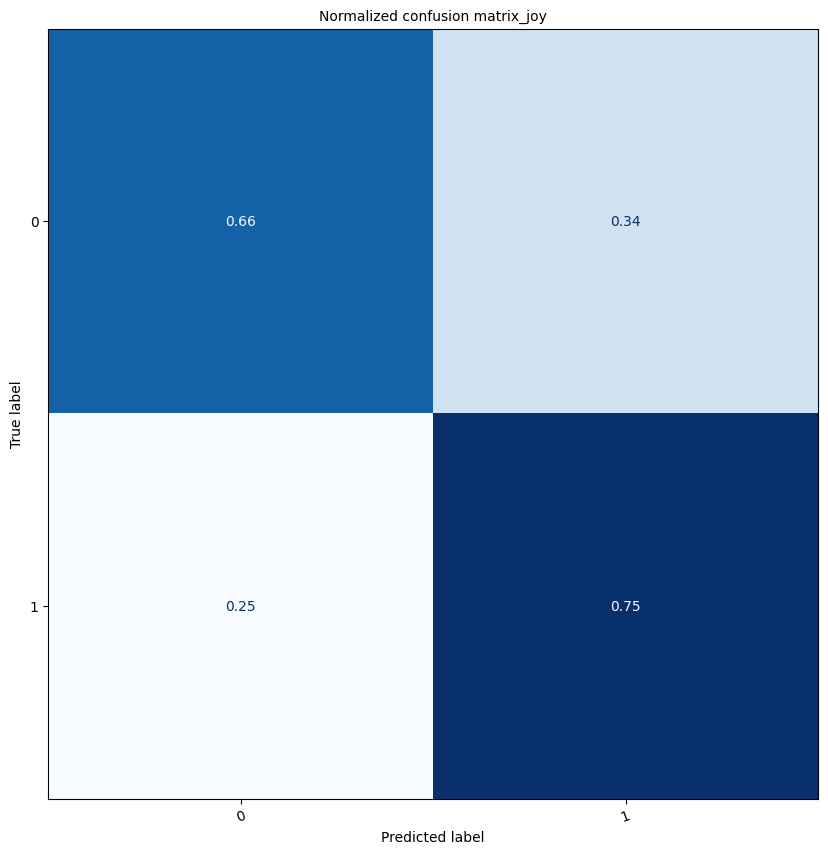